In [1]:
%conda install matplotlib -y
%conda install seaborn -y
%pip install gdown

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 6회차 과제
목표: 상관 분석 수행하기.  
(수업 자료의 `과제 연계 실습` 참고)

- 다음은 seaborn 라이브러리가 제공하는 자동차 사고 관련 데이터이다.
- 과속(*'speeding'*)와 사고(*'total'*) 사이의 상관 관계를 올바른 상관 분석 과정을 통해 찾으시오.
    - label을 포함한 산점도를 그리시오.
    - 공분산, 상관 계수를 계산하시오.
    - 상관 계수 검정을 수행하시오.

In [8]:
# Bring dataset
car = sns.load_dataset('car_crashes')
display(car)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


Text(0, 0.5, 'Number of accidents')

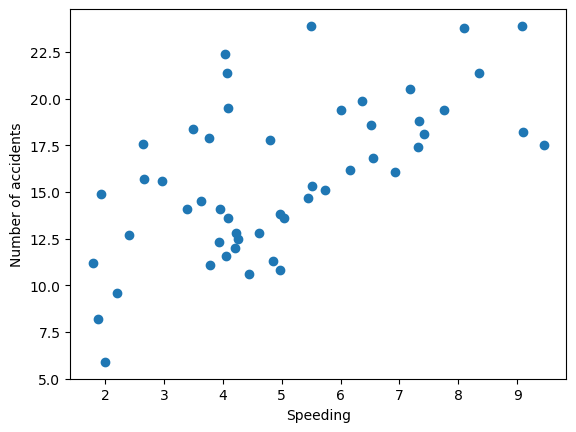

In [10]:
# Draw scatterplot graph
X = car.speeding.values
Y = car.total.values

plt.scatter(X,Y)
plt.xlabel('Speeding')
plt.ylabel('Number of accidents')

In [11]:
# calculate covariance (공분산)
np.cov([X, Y])[0][1]

5.086337960784313

In [12]:
# calculate correlation coefficient (상관 계수)
np.corrcoef([X, Y])[0][1]

0.6115476008001183

In [13]:
# correlation coefficient test (상관 계수 검정)
from scipy import stats
stats.pearsonr(X, Y)

PearsonRResult(statistic=0.6115476008001183, pvalue=1.8670391109056784e-06)

검정 통계량이 1.86 * 10^(-6) 이므로 X와 Y사이 어느 정도 상관관계가 존재한다. 